[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/10Y7kN0S8QP97t9F2e-mi3M3zxmLZDWpU?usp=sharing)

In [ ]:
## 코랩으로 작성한 코드

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 한글깨짐, 실행하고 런타임 다시 시작해야함
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
fm._rebuild()

In [4]:
# 음수 깨짐
matplotlib.rcParams['axes.unicode_minus'] = False

# 종업원 현황

In [ ]:
# 종업원현황데이터
data = "/content/drive/MyDrive/colab/guin/"
d = pd.read_csv(f'{data}종업원수.csv', encoding='cp949')

In [ ]:
d.head()

,STDR_YM,CTPRVN_NM,SIGNGU_NM,ADSTRD_NM,INDUTY_LCLAS_CODE,INDUTY_MLSFC_CODE,INDUTY_LCLAS_NM,INDUTY_MLSFC_NM,PRCSS_ENTRPRS_SE_CODE,PRCSS_ENTRPRS_SE,...,TOT_ENTRPRS_CO,EMPLY_CO,EMPLY_AVRG_CO,ECNY_CO,ECNY_AVRG_CO,RETIRE_CO,RETIRE_AVRG_CO,WAGE_AVRG_AM,REGIST_DE,OPERTOR_NM
0,2015-11,강원,강릉시,교1동,B,B07,광업,비금속광물 광업; 연료용 제외,4,소기업,...,1,3,3.0,0,0.0,0,0.0,24912000.0,2022-08-10,KEDSYS
1,2015-11,강원,강릉시,교1동,B,B07,광업,비금속광물 광업; 연료용 제외,4,소기업,...,1,3,3.0,0,0.0,0,0.0,26640000.0,2022-08-10,KEDSYS
2,2015-11,강원,강릉시,교1동,C,C16,제조업,목재 및 나무제품 제조업; 가구 제외,4,소기업,...,1,4,4.0,0,0.0,0,0.0,10988667.0,2022-08-10,KEDSYS
3,2015-11,강원,강릉시,교1동,C,C33,제조업,기타 제품 제조업,4,소기업,...,1,1,1.0,0,0.0,0,0.0,0.0,2022-08-10,KEDSYS
4,2015-11,강원,강릉시,교1동,D,D35,전기; 가스; 증기 및 공기조절 공급업,전기; 가스; 증기 및 공기조절 공급업,4,소기업,...,1,18,18.0,1,1.0,1,1.0,50123259.0,2022-08-10,KEDSYS


In [ ]:
# 칼럼 확인
d.columns

Index(['STDR_YM', 'CTPRVN_NM', 'SIGNGU_NM', 'ADSTRD_NM', 'INDUTY_LCLAS_CODE',
       'INDUTY_MLSFC_CODE', 'INDUTY_LCLAS_NM', 'INDUTY_MLSFC_NM',
       'PRCSS_ENTRPRS_SE_CODE', 'PRCSS_ENTRPRS_SE', 'PDSMLPZ_SCTN_CODE',
       'PDSMLPZ_SCTN', 'TOT_ENTRPRS_CO', 'EMPLY_CO', 'EMPLY_AVRG_CO',
       'ECNY_CO', 'ECNY_AVRG_CO', 'RETIRE_CO', 'RETIRE_AVRG_CO',
       'WAGE_AVRG_AM', 'REGIST_DE', 'OPERTOR_NM'],
      dtype='object')

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13961210 entries, 0 to 13961209
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   STDR_YM                object 
 1   CTPRVN_NM              object 
 2   SIGNGU_NM              object 
 3   ADSTRD_NM              object 
 4   INDUTY_LCLAS_CODE      object 
 5   INDUTY_MLSFC_CODE      object 
 6   INDUTY_LCLAS_NM        object 
 7   INDUTY_MLSFC_NM        object 
 8   PRCSS_ENTRPRS_SE_CODE  int64  
 9   PRCSS_ENTRPRS_SE       object 
 10  PDSMLPZ_SCTN_CODE      int64  
 11  PDSMLPZ_SCTN           object 
 12  TOT_ENTRPRS_CO         int64  
 13  EMPLY_CO               int64  
 14  EMPLY_AVRG_CO          float64
 15  ECNY_CO                int64  
 16  ECNY_AVRG_CO           float64
 17  RETIRE_CO              int64  
 18  RETIRE_AVRG_CO         float64
 19  WAGE_AVRG_AM           float64
 20  REGIST_DE              object 
 21  OPERTOR_NM             object 
dtypes: float64(4), i

In [ ]:
# 날짜 datetime으로 변경
d['STDR_YM'] = pd.to_datetime(d['STDR_YM'], format='%Y-%m')

In [ ]:
# 날짜 15년11월 ~ 22년5월
d.STDR_YM.unique()

array(['2015-11-01T00:00:00.000000000', '2015-12-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2016-02-01T00:00:00.000000000',
       '2016-03-01T00:00:00.000000000', '2016-04-01T00:00:00.000000000',
       '2016-05-01T00:00:00.000000000', '2016-06-01T00:00:00.000000000',
       '2016-07-01T00:00:00.000000000', '2016-08-01T00:00:00.000000000',
       '2016-09-01T00:00:00.000000000', '2016-10-01T00:00:00.000000000',
       '2016-11-01T00:00:00.000000000', '2016-12-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000', '2017-02-01T00:00:00.000000000',
       '2017-03-01T00:00:00.000000000', '2017-04-01T00:00:00.000000000',
       '2017-05-01T00:00:00.000000000', '2017-06-01T00:00:00.000000000',
       '2017-07-01T00:00:00.000000000', '2017-08-01T00:00:00.000000000',
       '2017-09-01T00:00:00.000000000', '2017-10-01T00:00:00.000000000',
       '2017-11-01T00:00:00.000000000', '2017-12-01T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000', '2018-02-01

# 종업원현황 결측치처리

In [ ]:
# 결측치
d.isnull().sum()
# 시군구 결측치는 전부 세종시
#PDSMLPZ_SCTN는 사용하지 않는 칼럼이라 처리 X

STDR_YM                       0
CTPRVN_NM                     0
SIGNGU_NM                 77692
ADSTRD_NM                     0
INDUTY_LCLAS_CODE             0
INDUTY_MLSFC_CODE             0
INDUTY_LCLAS_NM               0
INDUTY_MLSFC_NM               0
PRCSS_ENTRPRS_SE_CODE         0
PRCSS_ENTRPRS_SE              0
PDSMLPZ_SCTN_CODE             0
PDSMLPZ_SCTN               4697
TOT_ENTRPRS_CO                0
EMPLY_CO                      0
EMPLY_AVRG_CO                 0
ECNY_CO                       0
ECNY_AVRG_CO                  0
RETIRE_CO                     0
RETIRE_AVRG_CO                0
WAGE_AVRG_AM             171462
REGIST_DE                     0
OPERTOR_NM                    0
dtype: int64

In [ ]:
# 세종은 시군구가 없어서 null값
d[d.SIGNGU_NM.isnull() == True].CTPRVN_NM.value_counts()

세종    77692
Name: CTPRVN_NM, dtype: int64

In [ ]:
# 결측치 -> 세종시
d['SIGNGU_NM'].fillna('세종시')

0               강릉시
1               강릉시
2               강릉시
3               강릉시
4               강릉시
             ...   
13961205    청주시 흥덕구
13961206    청주시 흥덕구
13961207    청주시 흥덕구
13961208    청주시 흥덕구
13961209    청주시 흥덕구
Name: SIGNGU_NM, Length: 13961210, dtype: object

In [ ]:
d.loc[d['SIGNGU_NM'] != d['SIGNGU_NM'], 'SIGNGU_NM'] = '세종시'

In [ ]:
d['SIGNGU_NM'].isnull().sum()

0

In [ ]:
# 평균임금 0값, 널값 삭제
d = d[d.WAGE_AVRG_AM.isnull()==False]
d = d[d.WAGE_AVRG_AM!=0.00]

# 종업원 현황 칼럼 처리

In [ ]:
# 기업분류 원핫 인코딩
dummies = pd.get_dummies(d['PRCSS_ENTRPRS_SE'], prefix = 'PRCSS_ENTRPRS_SE')
frames = [d,dummies]
d = pd.concat(frames, axis = 1)

d = d.drop(columns = ['PRCSS_ENTRPRS_SE'])

In [ ]:
d = d.rename(columns={'PRCSS_ENTRPRS_SE_대기업':'대기업', 'PRCSS_ENTRPRS_SE_소기업':'소기업',
                   'PRCSS_ENTRPRS_SE_중견기업':'중견기업','PRCSS_ENTRPRS_SE_중기업':'중기업',
                   'PRCSS_ENTRPRS_SE_판단제외':'판단제외','PRCSS_ENTRPRS_SE_미분류':'미분류'})

In [ ]:
# 시도 + 시군구로 cs라는 새로운 변수 생성(ex 강원도 강릉시)
d['cs'] = d.CTPRVN_NM + ' ' + d.SIGNGU_NM

In [ ]:
d.columns

Index(['STDR_YM', 'CTPRVN_NM', 'SIGNGU_NM', 'ADSTRD_NM', 'INDUTY_LCLAS_CODE',
       'INDUTY_MLSFC_CODE', 'INDUTY_LCLAS_NM', 'INDUTY_MLSFC_NM',
       'PRCSS_ENTRPRS_SE_CODE', 'PDSMLPZ_SCTN_CODE', 'PDSMLPZ_SCTN',
       'TOT_ENTRPRS_CO', 'EMPLY_CO', 'EMPLY_AVRG_CO', 'ECNY_CO',
       'ECNY_AVRG_CO', 'RETIRE_CO', 'RETIRE_AVRG_CO', 'WAGE_AVRG_AM',
       'REGIST_DE', 'OPERTOR_NM', '대기업', '미분류', '소기업', '중견기업', '중기업', '판단제외',
       'cs'],
      dtype='object')

In [ ]:
# 필요 칼럼만 추출(기준년월, 지역명, 업종대분류, 종업원수, 평균종업원수, 퇴직수,평균퇴직수, 입사수,평군입사수, 평균임금, 기업분류(대기업,중견기업,중기업, 소기업, 판단제외))
df = d[['STDR_YM','cs','EMPLY_CO','RETIRE_CO','ECNY_CO',
        'EMPLY_AVRG_CO','ECNY_AVRG_CO','RETIRE_AVRG_CO','WAGE_AVRG_AM',
       '대기업', '소기업', '중견기업', '중기업', '판단제외','미분류' ]]
df.columns

Index(['STDR_YM', 'cs', 'EMPLY_CO', 'RETIRE_CO', 'ECNY_CO', 'EMPLY_AVRG_CO',
       'ECNY_AVRG_CO', 'RETIRE_AVRG_CO', 'WAGE_AVRG_AM', '대기업', '소기업', '중견기업',
       '중기업', '판단제외', '미분류'],
      dtype='object')

In [ ]:
# 지역명 같은 행 묶어서 sum 처리
df2 = df.groupby(["cs"],as_index=False).sum()

In [ ]:
# 지역명 같은 행 묶어서 avg 처리
df3 = df.groupby(["cs"],as_index=False).mean()

In [ ]:
# 칼럼 변경
df2['EMPLY_AVRG_CO'] = df3['EMPLY_AVRG_CO'] 
df2['ECNY_AVRG_CO'] = df3['ECNY_AVRG_CO'] 
df2['RETIRE_AVRG_CO'] = df3['RETIRE_AVRG_CO']
df2['WAGE_AVRG_AM'] = df3['WAGE_AVRG_AM']
df2['대기업'] = df3['대기업'] 
df2['중견기업'] = df3['중견기업'] 
df2['중기업'] = df3['중기업'] 
df2['소기업'] = df3['소기업'] 
df2['판단제외'] = df3['판단제외'] 
df2['미분류'] = df3['미분류']

In [ ]:
df = df2

In [ ]:
# 메모리 삭제
import gc
del df2, df3
gc.collect()

154

In [ ]:
df.head()

,cs,EMPLY_CO,RETIRE_CO,ECNY_CO,EMPLY_AVRG_CO,ECNY_AVRG_CO,RETIRE_AVRG_CO,WAGE_AVRG_AM,대기업,소기업,중견기업,중기업,판단제외,미분류
0,강원 강릉시,1070486,40477,42568,14.879333,0.580596,0.546831,2.593515e+07,0.000782,0.822054,0.004958,0.152355,0.019851,0.000000
1,강원 고성군,168245,7956,7708,14.927177,0.687136,0.724639,2.651624e+07,0.009848,0.817528,0.020803,0.096271,0.054996,0.000553
2,강원 동해시,313422,12448,12854,11.746612,0.459744,0.441559,2.682128e+07,0.008945,0.790225,0.004419,0.181663,0.014748,0.000000
3,강원 삼척시,390794,11132,11174,18.250928,0.454804,0.448714,2.706339e+07,0.004574,0.845116,0.020207,0.099242,0.030861,0.000000
4,강원 속초시,257406,10693,11392,13.981858,0.606631,0.567369,2.532617e+07,0.005255,0.784156,0.005255,0.186976,0.018358,0.000000


In [ ]:
# 분모(종업원수)가 0 인 행 삭제 
mask = df['EMPLY_AVRG_CO'].isin([0])
df = df[~mask]

In [ ]:
# 고용위기지표: (퇴사자수-입사자수)/종업원수
def risk_index(df):
  return (df['RETIRE_CO'] - df['ECNY_CO']) / df['EMPLY_CO']

df['R_INDEX']= df.apply(risk_index,axis=1)

In [ ]:
df.head()

,cs,EMPLY_CO,RETIRE_CO,ECNY_CO,EMPLY_AVRG_CO,ECNY_AVRG_CO,RETIRE_AVRG_CO,WAGE_AVRG_AM,대기업,소기업,중견기업,중기업,판단제외,미분류,R_INDEX
0,강원 강릉시,1070486,40477,42568,14.879333,0.580596,0.546831,2.593515e+07,0.000782,0.822054,0.004958,0.152355,0.019851,0.000000,-0.001953
1,강원 고성군,168245,7956,7708,14.927177,0.687136,0.724639,2.651624e+07,0.009848,0.817528,0.020803,0.096271,0.054996,0.000553,0.001474
2,강원 동해시,313422,12448,12854,11.746612,0.459744,0.441559,2.682128e+07,0.008945,0.790225,0.004419,0.181663,0.014748,0.000000,-0.001295
3,강원 삼척시,390794,11132,11174,18.250928,0.454804,0.448714,2.706339e+07,0.004574,0.845116,0.020207,0.099242,0.030861,0.000000,-0.000107
4,강원 속초시,257406,10693,11392,13.981858,0.606631,0.567369,2.532617e+07,0.005255,0.784156,0.005255,0.186976,0.018358,0.000000,-0.002716


# 위기지역 확인

In [ ]:
df1 = df[df.R_INDEX>0]

In [ ]:
df1=df1.reset_index(drop=False)

In [ ]:
df1.columns

Index(['index', 'cs', 'EMPLY_CO', 'RETIRE_CO', 'ECNY_CO', 'EMPLY_AVRG_CO',
       'ECNY_AVRG_CO', 'RETIRE_AVRG_CO', 'WAGE_AVRG_AM', '대기업', '소기업', '중견기업',
       '중기업', '판단제외', '미분류', 'R_INDEX'],
      dtype='object')

## 지역시계열클러스터링을 위한 csv만들기

In [ ]:
list1=list(df1.cs)

In [ ]:
df = d[['STDR_YM','cs','EMPLY_CO','RETIRE_CO','ECNY_CO','TOT_ENTRPRS_CO',
        'EMPLY_AVRG_CO','ECNY_AVRG_CO','RETIRE_AVRG_CO','WAGE_AVRG_AM',
       '대기업', '소기업', '중견기업', '중기업', '판단제외','미분류' ]]

In [ ]:
# 날짜, 지역으로 group
df2 = df.groupby(['STDR_YM',"cs"],as_index=False).sum()
df3 = df.groupby(['STDR_YM',"cs"],as_index=False).mean()

In [ ]:
# 칼럼 변경
df2['EMPLY_AVRG_CO'] = df3['EMPLY_AVRG_CO'] 
df2['ECNY_AVRG_CO'] = df3['ECNY_AVRG_CO'] 
df2['RETIRE_AVRG_CO'] = df3['RETIRE_AVRG_CO']
df2['WAGE_AVRG_AM'] = df3['WAGE_AVRG_AM']
df2['대기업'] = df3['대기업'] 
df2['중견기업'] = df3['중견기업'] 
df2['중기업'] = df3['중기업'] 
df2['소기업'] = df3['소기업'] 
df2['판단제외'] = df3['판단제외'] 
df2['미분류'] = df3['미분류']

In [ ]:
df = df2

In [ ]:
def risk_cs(x):
    if x in list1:
      return 1
    else:
      return 0

df['위기지역']= df['cs'].apply(risk_cs)

In [ ]:
df.위기지역.value_counts()

0    16748
1     3002
Name: 위기지역, dtype: int64

In [ ]:
df.to_csv('종업원_지역.csv',index=False)

# 위기지역

In [ ]:
d_지역 = pd.read_csv('종업원_지역.csv')

In [ ]:
# 날짜 형식 변경
d_지역['STDR_YM'] = pd.to_datetime(d_지역['STDR_YM'], format='%Y-%m')

In [ ]:
# 결측치
d_지역.isnull().sum()

STDR_YM           0
cs                0
EMPLY_CO          0
RETIRE_CO         0
ECNY_CO           0
TOT_ENTRPRS_CO    0
EMPLY_AVRG_CO     0
ECNY_AVRG_CO      0
RETIRE_AVRG_CO    0
WAGE_AVRG_AM      0
대기업               0
소기업               0
중견기업              0
중기업               0
판단제외              0
미분류               0
위기지역              0
dtype: int64

# 위기지역 칼럼처리

In [ ]:
# 분모(종업원수)가 0 인 행 삭제 
mask = d_지역['EMPLY_AVRG_CO'].isin([0])
d_지역 = d_지역[~mask]

In [ ]:
# 고용위기지표: (퇴사자수-입사자수)/종업원수
def risk_index(d_지역):
  return (d_지역['RETIRE_CO'] - d_지역['ECNY_CO']) / d_지역['EMPLY_CO']

d_지역['R_INDEX']= d_지역.apply(risk_index,axis=1)

In [ ]:
# 위기지역만 뽑기
df = d_지역[d_지역.위기지역==1]

In [ ]:
# 필요한 칼럼만 선택
df1 = df[['STDR_YM','cs','R_INDEX']]

In [ ]:
# 피벗테이블 생성
df11 = df1.pivot(
    index='STDR_YM',
    columns='cs',
    values='R_INDEX')

In [ ]:
df11.head()

cs,강원 고성군,강원 태백시,경기 동두천시,경기 안산시 단원구,경남 거제시,경남 고성군,경남 창녕군,경남 창원시 마산합포구,경남 창원시 마산회원구,경남 창원시 성산구,...,서울 종로구,서울 중랑구,울산 울주군,인천 강화군,인천 미추홀구,인천 부평구,전남 곡성군,전남 보성군,전북 임실군,충남 청양군
STDR_YM,,,,,,,,,,,,,,,,,,,,,
2015-11-01,-0.007203,-0.004058,-0.014523,-0.005277,-0.008394,-0.015751,0.002117,0.000653,-0.008029,0.000629,...,-0.000153,0.001856,-0.000308,-0.006161,-0.000947,-0.001010,-0.013691,0.002960,0.002449,-0.009847
2015-12-01,0.013864,0.010342,0.008294,0.008613,0.003790,0.004095,0.010665,0.018841,0.006993,0.006875,...,0.010075,0.005864,0.005753,0.007060,0.005399,0.005841,0.001558,-0.014599,0.014279,0.014244
2016-01-01,0.045455,-0.006369,-0.010164,-0.005985,-0.015623,-0.025154,0.004287,-0.024309,-0.005935,-0.005511,...,-0.004765,-0.014848,-0.002012,-0.047759,-0.004489,-0.007106,-0.006767,0.003897,-0.001985,-0.001493
2016-02-01,0.002535,-0.060684,0.002246,0.000980,0.020430,0.009614,0.006260,-0.002573,-0.001218,0.020878,...,0.026558,0.000979,-0.001383,0.003839,-0.000771,-0.002436,0.009419,0.008751,0.012948,-0.008281
2016-03-01,0.005047,0.023116,0.003185,0.012584,0.011464,0.005553,0.009245,0.009041,0.012516,-0.014054,...,0.005839,-0.000586,0.013068,0.006072,-0.001542,0.004421,-0.015528,0.009192,-0.001490,0.006843


In [ ]:
# 결측치 제거
df11.dropna(axis='columns', how='any',inplace=True)

In [22]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import random
from subprocess import check_output
import os

# for generating pairwise (dis)similarity matrices
import sklearn.neighbors as skn
import sklearn.metrics as skm

import sklearn
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix, parallel_coordinates, andrews_curves

# for clustering models
from sklearn import cluster
import scipy.cluster.hierarchy as hclust
import scipy.stats
from sklearn.neighbors import kneighbors_graph

from IPython import display
from IPython.core.display import Image

import matplotlib.pyplot as plt
%matplotlib inline
import tslearn

from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
from tslearn.preprocessing import TimeSeriesScalerMinMax

from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation, OneD_SymbolicAggregateApproximation

from tslearn.clustering import TimeSeriesKMeans

seed = 1
np.random.seed(seed)

In [ ]:
# 테이블 형태 변경
df_transposed = df11.T
df_transposed.head()

STDR_YM,2015-11-01,2015-12-01,2016-01-01,2016-02-01,2016-03-01,2016-04-01,2016-05-01,2016-06-01,2016-07-01,2016-08-01,...,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,2022-03-01,2022-04-01,2022-05-01
cs,,,,,,,,,,,,,,,,,,,,,
강원 고성군,-0.007203,0.013864,0.045455,0.002535,0.005047,-0.007600,-0.001265,0.016571,-0.005711,-0.007002,...,0.042490,-0.016570,0.103488,-0.011520,0.013831,-0.015660,0.015142,-0.004218,0.015260,-0.008104
강원 태백시,-0.004058,0.010342,-0.006369,-0.060684,0.023116,-0.012532,0.005608,0.000000,0.013956,-0.008337,...,0.003294,-0.007900,-0.003255,-0.002463,0.025322,-0.032428,0.029027,-0.023389,-0.016586,0.003221
경기 동두천시,-0.014523,0.008294,-0.010164,0.002246,0.003185,-0.019593,0.002214,0.006658,-0.013314,0.005915,...,0.004894,-0.006836,-0.008649,0.001551,0.038858,-0.008662,0.009707,-0.019185,0.008486,0.000797
경기 안산시 단원구,-0.005277,0.008613,-0.005985,0.000980,0.012584,-0.005193,0.000871,0.001216,0.001369,0.001883,...,0.003663,-0.005913,0.004212,-0.005176,0.004369,-0.007012,0.004847,-0.001080,-0.004274,0.001479
경남 거제시,-0.008394,0.003790,-0.015623,0.020430,0.011464,0.009242,0.007674,0.025970,0.025482,0.014184,...,0.018548,-0.006761,0.001710,0.016157,0.027219,-0.026681,0.009258,-0.007153,-0.001678,0.006129


In [ ]:
df_matrix = df_transposed.to_numpy()

# 위기지역 클러스터링

In [ ]:
scaler = TimeSeriesScalerMeanVariance()
df_scaled = scaler.fit_transform(df_matrix)

In [ ]:
sz = df_scaled.shape[1]

In [ ]:
# 시계열 클러스터링
k=2
dba_km = TimeSeriesKMeans(n_clusters=k,
                          metric="dtw",
                          verbose=True, 
                          random_state=33)
y_pred = dba_km.fit_predict(df_scaled)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:    0.0s finished


38.615 --> 27.188 --> 26.755 --> 26.755 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:    0.0s finished


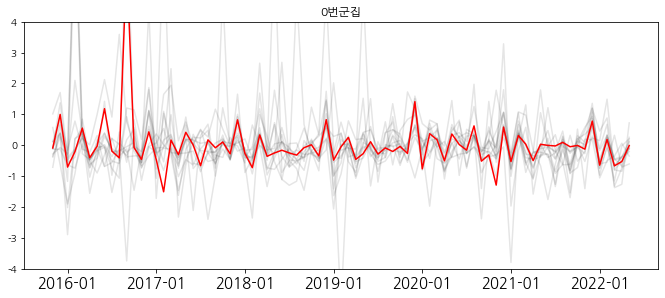

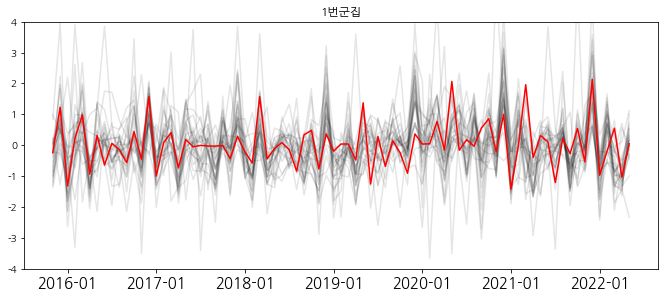

In [ ]:
# plot DBA-k-means clusters
for yi in range(k):
    plt.figure(figsize=(25,10))
    plt.subplot(2, 2, 2 + yi)
    for xx in df_scaled[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.1)
        plt.title(f'{yi}번군집')
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xticks([2,14,26,38,50,62,74],labels=['2016-01','2017-01','2018-01','2019-01','2020-01','2021-01','2022-01'],fontsize=15)
    plt.ylim(-4, 4)

#0번군집은 16~17년도 사이의 고용위기가 눈에 띔
#1번군집은 계속 좋지 않은 추세이며 코로나때 미세하게 더 안좋아짐

In [ ]:
# 클러스터링 결과 확인
df_transposed['cluster'] = dba_km.labels_

In [ ]:
df_transposed = df_transposed.reset_index()

In [ ]:
list0 = list(df_transposed[df_transposed['cluster']==0]['cs'])

In [ ]:
list1 = list(df_transposed[df_transposed['cluster']==1]['cs'])

In [ ]:
# 지역별로 그룹화
df3 = df.groupby(["cs"],as_index=False).mean()

In [ ]:
# 지역명에서 시만 사용
def cs(x):
  return x.split()[0]

df3['시']= df3['cs'].apply(cs)

In [ ]:
# 클러스터 결과 할당
def Cluster(x):
    if x in list0:
      return 0
    elif x in list1:
      return 1
df3['클러스터']= df3['cs'].apply(Cluster)

In [ ]:
df3.클러스터.value_counts()

1    26
0    12
Name: 클러스터, dtype: int64

In [ ]:
# 군집별 임금 차이는 거의 없음
for i in range(k):
  print(i,'번 군집: ' ,np.mean(df3[df3['클러스터']==i].WAGE_AVRG_AM))

0 번 군집:  28523316.586980823
1 번 군집:  28432143.776618347


In [ ]:
# 0번 클러스터에 속한 지역명
print('0번 클러스터',df3[df3['클러스터']==0].cs.unique())

0번 클러스터 ['경남 창원시 진해구' '경남 통영시' '광주 동구' '대구 중구' '부산 부산진구' '부산 사하구' '부산 서구' '부산 영도구'
 '서울 종로구' '인천 강화군' '인천 부평구' '전북 임실군']


In [ ]:
# 1번 클러스터에 속한 지역명
print('1번 클러스터',df3[df3['클러스터']==1].cs.unique())

1번 클러스터 ['강원 고성군' '강원 태백시' '경기 동두천시' '경기 안산시 단원구' '경남 거제시' '경남 고성군' '경남 창녕군'
 '경남 창원시 마산합포구' '경남 창원시 마산회원구' '경남 창원시 성산구' '경남 함안군' '경북 경주시' '경북 칠곡군'
 '대구 서구' '대전 중구' '부산 동구' '부산 사상구' '부산 중구' '서울 강동구' '서울 도봉구' '서울 중랑구'
 '울산 울주군' '인천 미추홀구' '전남 곡성군' '전남 보성군' '충남 청양군']


In [ ]:
# 경남 창원시 진해구와 경남 거제시는 둘다 18년도에 조선업으로 인한 고용위기 지역으로 선정되었음
# 근데 왜 군집이 다를까?

Text(0.5, 1.0, '경남 거제시')

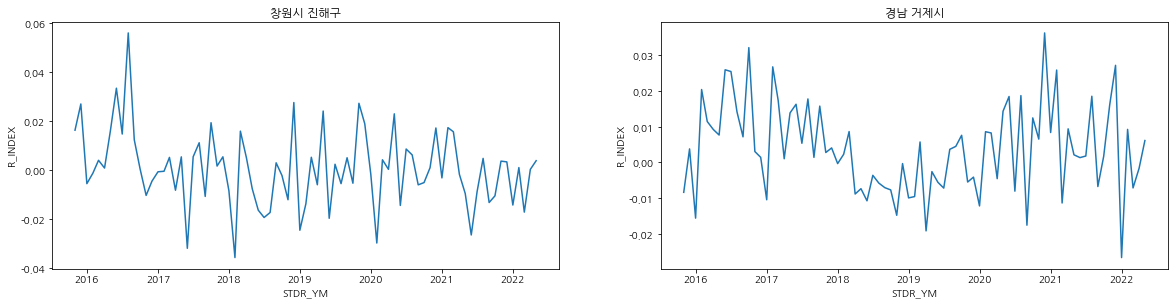

In [ ]:
# 창원시 진해구는 계속 지표가 안좋긴 하지만 16~17년 사이가 특히 안좋음
# 거제시는 16~17에도 안좋지만 코로나 시기에도 비슷하게 좋지 않아 그래프 모양이 다른 것을 확인 할 수 있음
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.lineplot(x=df11.index , y=df11['경남 창원시 진해구'])
plt.ylabel('R_INDEX')
plt.title('창원시 진해구')

plt.subplot(2,2,2)
sns.lineplot(x=df11.index , y=df11['경남 거제시'])
plt.ylabel('R_INDEX')
plt.title('경남 거제시')

# 위기 산업

In [ ]:
d.columns

Index(['STDR_YM', 'CTPRVN_NM', 'SIGNGU_NM', 'ADSTRD_NM', 'INDUTY_LCLAS_CODE',
       'INDUTY_MLSFC_CODE', 'INDUTY_LCLAS_NM', 'INDUTY_MLSFC_NM',
       'PRCSS_ENTRPRS_SE_CODE', 'PDSMLPZ_SCTN_CODE', 'PDSMLPZ_SCTN',
       'TOT_ENTRPRS_CO', 'EMPLY_CO', 'EMPLY_AVRG_CO', 'ECNY_CO',
       'ECNY_AVRG_CO', 'RETIRE_CO', 'RETIRE_AVRG_CO', 'WAGE_AVRG_AM',
       'REGIST_DE', 'OPERTOR_NM', '대기업', '미분류', '소기업', '중견기업', '중기업', '판단제외',
       'cs'],
      dtype='object')

In [ ]:
# 업종대분류 + 중분류로 '업종대중'이라는 새로운 변수 생성(ex 제조업 기타운송장비제조)
d['업종대중'] = d.INDUTY_LCLAS_NM + ' ' + d.INDUTY_MLSFC_NM

In [ ]:
# 필요 칼럼만 추출(기준년월, 업종대중, 종업원수, 평균종업원수, 퇴직수,평균퇴직수, 입사수,평군입사수, 평균임금, 기업분류(대기업,중견기업,중기업, 소기업, 판단제외))
df = d[['STDR_YM','업종대중','EMPLY_CO','RETIRE_CO','ECNY_CO',
        'EMPLY_AVRG_CO','ECNY_AVRG_CO','RETIRE_AVRG_CO','WAGE_AVRG_AM',
       '대기업', '소기업', '중견기업', '중기업', '판단제외','미분류' ]]
df.columns

Index(['STDR_YM', '업종대중', 'EMPLY_CO', 'RETIRE_CO', 'ECNY_CO', 'EMPLY_AVRG_CO',
       'ECNY_AVRG_CO', 'RETIRE_AVRG_CO', 'WAGE_AVRG_AM', '대기업', '소기업', '중견기업',
       '중기업', '판단제외', '미분류'],
      dtype='object')

In [ ]:
# '업종대중'이 같은 행 묶어서 sum 처리
df2 = df.groupby(["업종대중"],as_index=False).sum()

In [ ]:
# '업종대중'이 같은 행 묶어서 avg 처리
df3 = df.groupby(["업종대중"],as_index=False).mean()

In [ ]:
# 칼럼 변경
df2['EMPLY_AVRG_CO'] = df3['EMPLY_AVRG_CO'] 
df2['ECNY_AVRG_CO'] = df3['ECNY_AVRG_CO'] 
df2['RETIRE_AVRG_CO'] = df3['RETIRE_AVRG_CO']
df2['WAGE_AVRG_AM'] = df3['WAGE_AVRG_AM']
df2['대기업'] = df3['대기업'] 
df2['중견기업'] = df3['중견기업'] 
df2['중기업'] = df3['중기업'] 
df2['소기업'] = df3['소기업'] 
df2['판단제외'] = df3['판단제외'] 
df2['미분류'] = df3['미분류']

In [ ]:
df = df2

In [ ]:
import gc
del df2, df3
gc.collect()

23280

In [ ]:
# 분모(종업원수)가 0 인 행 삭제 
mask = df['EMPLY_AVRG_CO'].isin([0])
df = df[~mask]

In [ ]:
# 고용위기지표: (퇴사자수-입사자수)/종업원수
def risk_index(df):
  return (df['RETIRE_CO'] - df['ECNY_CO']) / df['EMPLY_CO']

df['R_INDEX']= df.apply(risk_index,axis=1)

# 위기산업 확인

In [ ]:
df1 = df[df.R_INDEX>0]

In [ ]:
df1=df1.reset_index(drop=False)

## 산업 클러스터링을 위한 csv만들기

In [ ]:
list1=list(df1.업종대중)

In [ ]:
df = d[['STDR_YM','업종대중','EMPLY_CO','RETIRE_CO','ECNY_CO',
        'EMPLY_AVRG_CO','ECNY_AVRG_CO','RETIRE_AVRG_CO','WAGE_AVRG_AM',
       '대기업', '소기업', '중견기업', '중기업', '판단제외','미분류' ]]

In [ ]:
df2 = df.groupby(['STDR_YM',"업종대중"],as_index=False).sum()
df3 = df.groupby(['STDR_YM',"업종대중"],as_index=False).mean()

In [ ]:
df2['EMPLY_AVRG_CO'] = df3['EMPLY_AVRG_CO'] 
df2['ECNY_AVRG_CO'] = df3['ECNY_AVRG_CO'] 
df2['RETIRE_AVRG_CO'] = df3['RETIRE_AVRG_CO']
df2['WAGE_AVRG_AM'] = df3['WAGE_AVRG_AM']
df2['대기업'] = df3['대기업'] 
df2['중견기업'] = df3['중견기업'] 
df2['중기업'] = df3['중기업'] 
df2['소기업'] = df3['소기업'] 
df2['판단제외'] = df3['판단제외'] 
df2['미분류'] = df3['미분류']

In [ ]:
df = df2

In [ ]:
def risk_in(x):
    if x in list1:
      return 1
    else:
      return 0

df['위기산업']= df['업종대중'].apply(risk_in)

In [ ]:
df.to_csv('종업원_위기산업.csv',index=False)

In [ ]:
d_산업 = pd.read_csv('종업원_위기산업.csv')

In [ ]:
d_산업.columns

Index(['STDR_YM', '업종대중', 'EMPLY_CO', 'RETIRE_CO', 'ECNY_CO', 'EMPLY_AVRG_CO',
       'ECNY_AVRG_CO', 'RETIRE_AVRG_CO', 'WAGE_AVRG_AM', '대기업', '소기업', '중견기업',
       '중기업', '판단제외', '미분류', '위기산업'],
      dtype='object')

In [ ]:
d_산업['STDR_YM'] = pd.to_datetime(d_산업['STDR_YM'], format='%Y-%m')

In [ ]:
d_산업.isnull().sum()

STDR_YM           0
업종대중              0
EMPLY_CO          0
RETIRE_CO         0
ECNY_CO           0
EMPLY_AVRG_CO     0
ECNY_AVRG_CO      0
RETIRE_AVRG_CO    0
WAGE_AVRG_AM      0
대기업               0
소기업               0
중견기업              0
중기업               0
판단제외              0
미분류               0
위기산업              0
dtype: int64

# 위기산업 칼럼처리

In [ ]:
# 분모(종업원수)가 0 인 행 삭제 
mask = d_산업['EMPLY_AVRG_CO'].isin([0])
d_산업 = d_산업[~mask]

In [ ]:
# 고용위기지표: (퇴사자수-입사자수)/종업원수
def risk_index(d_산업):
  return (d_산업['RETIRE_CO'] - d_산업['ECNY_CO']) / d_산업['EMPLY_CO']

d_산업['R_INDEX']= d_산업.apply(risk_index,axis=1)

In [ ]:
df = d_산업[d_산업.위기산업==1]

In [ ]:
# 필요한 칼럼만 선택
df1 = df[['STDR_YM','업종대중','R_INDEX']]

In [ ]:
# 피벗테이블형식으로 변경
df11 = df1.pivot(
    index='STDR_YM',
    columns='업종대중',
    values='R_INDEX')

In [ ]:
df11.head()

업종대중,가구 내 고용활동 및 달리 분류되지 않은 자가소비 생산활동 달리 분류되지 않은 자가소비를 위한 가구의 재화 및 서비스 생산활동,광업 금속 광업,광업 석탄; 원유 및 천연가스 광업,국제 및 외국기관 국제 및 외국기관,금융 및 보험업 금융업,농업; 임업 및 어업 어업,보건업 및 사회복지 서비스업 보건업,사업시설 관리; 사업 지원 및 임대 서비스업 사업시설 관리 및 조경 서비스업,숙박 및 음식점업 숙박업,운수 및 창고업 수상 운송업,운수 및 창고업 육상운송 및 파이프라인 운송업,제조업 가죽; 가방 및 신발 제조업,제조업 기타 운송장비 제조업,제조업 목재 및 나무제품 제조업; 가구 제외,제조업 비금속 광물제품 제조업,제조업 섬유제품 제조업; 의복제외,제조업 의복; 의복 액세서리 및 모피제품 제조업,제조업 자동차 및 트레일러 제조업
STDR_YM,,,,,,,,,,,,,,,,,,
2015-11-01,0.0,-0.015152,0.000608,0.000000,-0.001041,-0.009907,-0.005149,-0.000769,-0.007984,-0.001347,0.001342,-0.007257,-0.002019,-0.010797,0.000663,-0.001315,-0.006825,-0.002964
2015-12-01,0.0,0.021407,0.010949,0.000000,0.020102,0.004101,0.005858,0.048444,-0.013200,0.009046,0.002104,0.003205,0.006135,-0.006072,0.005355,0.002300,-0.008780,0.004982
2016-01-01,0.0,0.015674,0.004292,0.241379,-0.004667,-0.003500,0.003123,-0.022386,-0.041423,-0.015664,-0.005390,-0.014708,-0.005812,-0.010203,-0.003165,-0.007117,-0.005764,-0.007363
2016-02-01,0.0,0.003155,-0.006109,-0.045455,-0.003979,0.002380,0.299669,-0.019009,0.039624,0.005277,0.004772,-0.000265,0.019604,-0.008226,-0.003084,-0.000212,0.001689,-0.003551
2016-03-01,0.0,0.009585,0.000612,-0.043478,0.004973,0.014553,-0.008492,0.006184,0.015709,0.009564,0.007114,0.010379,0.003967,0.009435,0.004391,0.006374,0.013741,0.004842


In [ ]:
df11.dropna(axis='columns', how='any',inplace=True)

In [ ]:
# 형태 변경
df_transposed = df11.T
df_transposed.head()

STDR_YM,2015-11-01,2015-12-01,2016-01-01,2016-02-01,2016-03-01,2016-04-01,2016-05-01,2016-06-01,2016-07-01,2016-08-01,...,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,2022-03-01,2022-04-01,2022-05-01
업종대중,,,,,,,,,,,,,,,,,,,,,
광업 금속 광업,-0.015152,0.021407,0.015674,0.003155,0.009585,0.015974,-0.006536,-0.006431,-0.022013,0.022082,...,-0.010101,-0.043902,0.009709,0.000000,0.014706,0.009901,-0.004902,0.029851,-0.015228,-0.020202
광업 석탄; 원유 및 천연가스 광업,0.000608,0.010949,0.004292,-0.006109,0.000612,0.009816,0.002480,0.003115,0.006862,0.006918,...,0.012203,0.000684,0.005495,-0.002747,0.012405,-0.003463,0.004858,0.010453,-0.003494,-0.002104
국제 및 외국기관 국제 및 외국기관,0.000000,0.000000,0.241379,-0.045455,-0.043478,-0.258065,0.033333,-0.064516,0.028571,-0.031250,...,-0.041096,-0.026316,-0.012987,-0.073171,0.000000,0.000000,-0.034483,0.011765,-0.022727,0.000000
금융 및 보험업 금융업,-0.001041,0.020102,-0.004667,-0.003979,0.004973,-0.004548,0.001544,0.008205,0.007840,-0.001555,...,-0.001510,-0.003919,0.002819,-0.004690,0.012884,0.001101,-0.003768,0.069584,-0.002370,-0.002433
농업; 임업 및 어업 어업,-0.009907,0.004101,-0.003500,0.002380,0.014553,0.029307,0.015371,-0.019546,-0.016309,-0.011303,...,-0.000238,-0.004537,0.010231,0.001914,0.005297,-0.010823,-0.001919,0.005510,0.017595,0.004625


In [ ]:
df_matrix = df_transposed.to_numpy()

# 위기산업 클러스터링

In [ ]:
scaler = TimeSeriesScalerMeanVariance()
df_scaled = scaler.fit_transform(df_matrix)

In [ ]:
sz = df_scaled.shape[1]

In [ ]:
# 시계열 클러스터링
k=2
dba_km = TimeSeriesKMeans(n_clusters=k,
                          metric="dtw",
                          verbose=True, 
                          random_state=100)
y_pred = dba_km.fit_predict(df_scaled)

42.516 --> 27.850 --> 27.184 --> 27.184 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

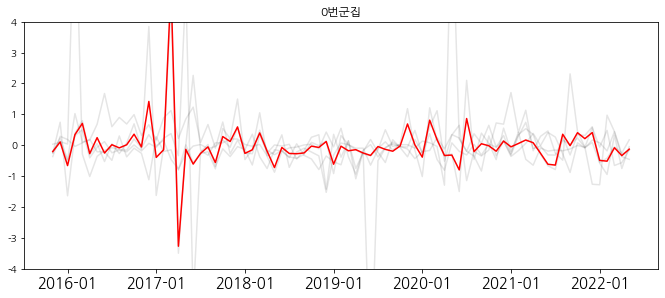

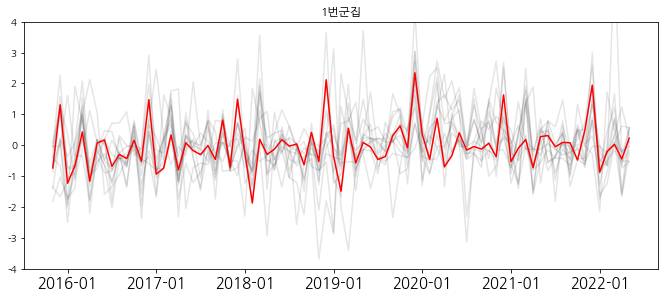

In [ ]:
# plot DBA-k-means clusters
for yi in range(k):
    plt.figure(figsize=(25,10))
    plt.subplot(2, 2, 2 + yi)
    for xx in df_scaled[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.1)
        plt.title(f'{yi}번군집')
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xticks([2,14,26,38,50,62,74],labels=['2016-01','2017-01','2018-01','2019-01','2020-01','2021-01','2022-01'],fontsize=15)
    plt.ylim(-4, 4)

#0번 군집은 16~17년도에 위기지표가 눈에 띄게 안좋아짐
# 1번군집은 계속 안좋고, 코로나때 미세하게 더 안좋아짐

In [ ]:
# 클러스터결과 할당
df_transposed['cluster'] = dba_km.labels_

In [ ]:
df_transposed = df_transposed.reset_index()

In [ ]:
list0 = list(df_transposed[df_transposed['cluster']==0]['업종대중'])

In [ ]:
list1 = list(df_transposed[df_transposed['cluster']==1]['업종대중'])

In [ ]:
df = df[[ '업종대중', 'EMPLY_CO',
       'RETIRE_CO', 'ECNY_CO', 'EMPLY_AVRG_CO',
       'ECNY_AVRG_CO', 'RETIRE_AVRG_CO', 'WAGE_AVRG_AM', '대기업', '소기업', '중견기업',
       '중기업', '판단제외', '미분류']]

In [ ]:
df3 = df.groupby(['업종대중'],as_index=False).mean()

In [ ]:
# 업종대분류만 분류하기
def risk_in1(x):
  return x.split()[0]

df3['업종대']= df3['업종대중'].apply(risk_in1)

In [ ]:
# 군집화 결과 할당
def cluseter2(x):
    if x in list0:
      return 0
    elif x in list1:
      return 1
df3['클러스터']= df3['업종대중'].apply(cluseter2)

In [ ]:
df3.클러스터.value_counts()

1.0    12
0.0     5
Name: 클러스터, dtype: int64

In [ ]:
# 군집의 평균 임금은 차이 없음
for i in range(k):
  print(i,'번 군집: ' ,np.mean(df3[df3['클러스터']==i].WAGE_AVRG_AM))

0 번 군집:  30651996.78261419
1 번 군집:  30849684.77732187


In [ ]:
# 전체적으로 제조업이 많음
for i in range(k):
  print(i,'번 군집: ' ,df3[df3['클러스터']==i].업종대.value_counts())

0 번 군집:  운수     2
광업     1
보건업    1
제조업    1
Name: 업종대, dtype: int64
1 번 군집:  제조업     6
광업      1
국제      1
금융      1
농업;     1
사업시설    1
숙박      1
Name: 업종대, dtype: int64


In [ ]:
for i in range(k):
  print(i,'번 군집: ' ,df3[df3['클러스터']==i].업종대중.unique(),'\n')

# 16~17년도에 지표가 좋지 않은 0번 군집에는 조선업과 관련된 업종이 있음(수상운송업, 운송장비 제조업)
# 계속 좋지 않고, 코로나때 더 안좋아진 업종에는 숙박업, 제조업등이 많음

0 번 군집:  ['광업 금속 광업' '보건업 및 사회복지 서비스업 보건업' '운수 및 창고업 수상 운송업'
 '운수 및 창고업 육상운송 및 파이프라인 운송업' '제조업 기타 운송장비 제조업'] 

1 번 군집:  ['광업 석탄; 원유 및 천연가스 광업' '국제 및 외국기관 국제 및 외국기관' '금융 및 보험업 금융업'
 '농업; 임업 및 어업 어업' '사업시설 관리; 사업 지원 및 임대 서비스업 사업시설 관리 및 조경 서비스업'
 '숙박 및 음식점업 숙박업' '제조업 가죽; 가방 및 신발 제조업' '제조업 목재 및 나무제품 제조업; 가구 제외'
 '제조업 비금속 광물제품 제조업' '제조업 섬유제품 제조업; 의복제외' '제조업 의복; 의복 액세서리 및 모피제품 제조업'
 '제조업 자동차 및 트레일러 제조업'] 



# 제조업 클러스터링 전처리

In [5]:
data = "/content/drive/MyDrive/colab/guin/"
d = pd.read_csv(f'{data}종업원수.csv', encoding='cp949')

In [6]:
# 제조업 추출
df = d[(d['INDUTY_LCLAS_NM'] == '제조업')]

In [7]:
# 결측치가 모두 '세종시'임을 파악하여 세종시로 바꾸어줌
df['SIGNGU_NM'].fillna('세종시')
df.loc[df['SIGNGU_NM'] != df['SIGNGU_NM'], 'SIGNGU_NM'] = '세종시'

In [8]:
# 필요 칼럼만 추출(날짜, 시군구, 시도, 업종대분류, 중분류, 종업원수, 입사자수, 퇴직자수, 평균임금, 기업분류(대,중,중견, 소기업, 판단제외))
df = df[['STDR_YM','CTPRVN_NM','SIGNGU_NM','INDUTY_LCLAS_NM','INDUTY_MLSFC_NM','EMPLY_CO','RETIRE_CO','ECNY_CO']]

In [9]:
# '년월, 시군구, 대분류','중분류' 같은 행 묶어서 sum 처리
df_sum = df.groupby(["CTPRVN_NM", "STDR_YM", "SIGNGU_NM", "INDUTY_LCLAS_NM",'INDUTY_MLSFC_NM'],as_index=False).sum()

In [10]:
mask = df_sum['EMPLY_CO'].isin([0])
df_sum = df_sum[~mask]

In [11]:
# 위기지표
def risk_index(df):
  return (df['RETIRE_CO'] - df['ECNY_CO']) / df['EMPLY_CO']

df_sum['R_INDEX']= df_sum.apply(risk_index,axis=1)

# 제조업 시계열 클러스터링

In [12]:
# 필요칼럼만 선택(날짜, 시도, 시군구, 업종대분류, 중분류, 위기지표)
df2 = df_sum[['STDR_YM','CTPRVN_NM','SIGNGU_NM','INDUTY_LCLAS_NM','INDUTY_MLSFC_NM','R_INDEX']]
df2.head()

,STDR_YM,CTPRVN_NM,SIGNGU_NM,INDUTY_LCLAS_NM,INDUTY_MLSFC_NM,R_INDEX
0,2015-11,강원,강릉시,제조업,1차 금속 제조업,0.000000
1,2015-11,강원,강릉시,제조업,가구 제조업,0.000000
2,2015-11,강원,강릉시,제조업,고무 및 플라스틱제품 제조업,0.037037
3,2015-11,강원,강릉시,제조업,금속가공제품 제조업; 기계 및 가구 제외,0.040000
4,2015-11,강원,강릉시,제조업,기타 기계 및 장비 제조업,-0.007299


In [13]:
# CTPRVN_SIGUNGU_INDUTY: 시도+시군구+업종대분류+중분류
df2['CTPRVN_SIGUNGU_INDUTY'] = df2[['CTPRVN_NM', 'SIGNGU_NM', 'INDUTY_LCLAS_NM','INDUTY_MLSFC_NM']].apply(lambda x: '_'.join(x), axis=1)

In [14]:
df2 = df2[['STDR_YM','R_INDEX','CTPRVN_SIGUNGU_INDUTY']]

In [15]:
df2['STDR_YM'] = pd.to_datetime(df2['STDR_YM'])

In [16]:
# 피벗테이블 생성
df22 = df2.pivot(
    index='STDR_YM',
    columns='CTPRVN_SIGUNGU_INDUTY',
    values='R_INDEX')
df22.head()

CTPRVN_SIGUNGU_INDUTY,강원_강릉시_제조업_1차 금속 제조업,강원_강릉시_제조업_가구 제조업,강원_강릉시_제조업_고무 및 플라스틱제품 제조업,강원_강릉시_제조업_금속가공제품 제조업; 기계 및 가구 제외,강원_강릉시_제조업_기타 기계 및 장비 제조업,강원_강릉시_제조업_기타 운송장비 제조업,강원_강릉시_제조업_기타 제품 제조업,강원_강릉시_제조업_목재 및 나무제품 제조업; 가구 제외,강원_강릉시_제조업_비금속 광물제품 제조업,강원_강릉시_제조업_산업용 기계 및 장비 수리업,...,충북_충주시_제조업_음료 제조업,충북_충주시_제조업_의료; 정밀; 광학기기 및 시계 제조업,충북_충주시_제조업_의료용 물질 및 의약품 제조업,충북_충주시_제조업_의복; 의복 액세서리 및 모피제품 제조업,충북_충주시_제조업_인쇄 및 기록매체 복제업,충북_충주시_제조업_자동차 및 트레일러 제조업,충북_충주시_제조업_전기장비 제조업,충북_충주시_제조업_전자부품; 컴퓨터; 영상; 음향 및 통신장비 제조업,충북_충주시_제조업_펄프; 종이 및 종이제품 제조업,충북_충주시_제조업_화학물질 및 화학제품 제조업; 의약품 제외
STDR_YM,,,,,,,,,,,,,,,,,,,,,
2015-11-01,0.000000,0.000000,0.037037,0.040000,-0.007299,NaN,0.000000,0.000000,-0.003409,0.030303,...,0.000000,-0.004464,-0.003063,-0.225806,-0.024096,-0.048930,-0.016582,0.023952,0.008529,-0.012690
2015-12-01,-0.111111,0.000000,-0.012821,0.021739,0.018248,NaN,0.222222,-0.142857,0.011325,0.000000,...,-0.058824,0.000000,-0.016541,-0.044118,0.012195,-0.011730,-0.003807,0.014315,0.004310,0.011250
2016-01-01,-0.100000,-0.055556,0.000000,-0.021277,-0.011029,NaN,-0.125000,0.000000,0.018497,-0.030303,...,0.088235,-0.004464,-0.003003,0.076923,0.036585,-0.005917,-0.006242,-0.002070,0.010941,0.015464
2016-02-01,0.000000,0.000000,0.011905,0.000000,0.000000,NaN,0.000000,-0.300000,-0.002326,0.000000,...,0.064516,0.008969,-0.016200,0.032258,0.000000,-0.029070,-0.017391,0.056680,-0.008696,-0.015404
2016-03-01,0.100000,0.000000,-0.050000,-0.111111,0.018519,NaN,0.000000,0.100000,-0.001160,0.000000,...,0.068966,0.008889,0.011662,-0.017241,-0.012658,0.051873,0.015854,0.004320,-0.002174,0.015504


In [17]:
# null값 삭제
df22.dropna(axis='columns', how='any',inplace=True)

In [18]:
# 행열 전환
df_transposed = df22.T
df_transposed.head()

STDR_YM,2015-11-01,2015-12-01,2016-01-01,2016-02-01,2016-03-01,2016-04-01,2016-05-01,2016-06-01,2016-07-01,2016-08-01,...,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,2022-03-01,2022-04-01,2022-05-01
CTPRVN_SIGUNGU_INDUTY,,,,,,,,,,,,,,,,,,,,,
강원_강릉시_제조업_1차 금속 제조업,0.000000,-0.111111,-0.100000,0.000000,0.100000,-0.100000,0.000000,0.000000,0.100000,0.111111,...,0.000000,0.000000,0.000000,-0.076923,-0.035714,-0.035714,0.000000,0.000000,0.034483,0.037037
강원_강릉시_제조업_가구 제조업,0.000000,0.000000,-0.055556,0.000000,0.000000,0.000000,0.055556,0.000000,-0.055556,0.000000,...,0.037037,-0.100000,-0.033333,0.032258,-0.033333,-0.032258,0.000000,-0.060606,0.030303,0.031250
강원_강릉시_제조업_고무 및 플라스틱제품 제조업,0.037037,-0.012821,0.000000,0.011905,-0.050000,0.025316,0.000000,0.025974,-0.083333,0.060976,...,-0.016129,0.014925,0.016129,-0.046875,0.015152,0.015625,0.015152,0.016393,0.050847,0.070175
강원_강릉시_제조업_금속가공제품 제조업; 기계 및 가구 제외,0.040000,0.021739,-0.021277,0.000000,-0.111111,-0.037037,-0.017241,-0.049180,0.000000,0.034483,...,-0.014493,-0.014085,-0.026667,0.013333,0.000000,0.013514,-0.013514,0.000000,-0.013333,-0.013333
강원_강릉시_제조업_기타 기계 및 장비 제조업,-0.007299,0.018248,-0.011029,0.000000,0.018519,0.003745,0.011321,-0.003802,-0.007576,0.003759,...,-0.024306,-0.023729,0.019868,-0.003436,0.068493,-0.003636,0.039711,-0.007435,-0.018382,0.000000


In [19]:
df_matrix = df_transposed.to_numpy()

In [20]:
seed = 43
np.random.seed(seed)

In [24]:
scaler = TimeSeriesScalerMeanVariance()
df_scaled = scaler.fit_transform(df_matrix)

In [25]:
sz = df_scaled.shape[1]

k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9


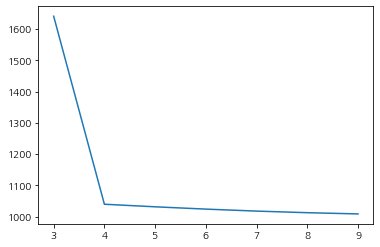

In [ ]:
# Elbow criterion
def elbow_plot(data, maxK=10, seed_centroids=None):
    sse = {}
    for k in range(3, maxK):
        print("k: ", k)
        if seed_centroids is not None:
            seeds = seed_centroids.head(k)
            kmeans = cluster.KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=0, init=np.reshape(seeds, (k,1))).fit(data)
            data["clusters"] = kmeans.labels_
        else:
            kmeans = cluster.KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data)
            data["clusters"] = kmeans.labels_

        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()
    return


elbow_plot(df_transposed, maxK=10)

# 군집 4개가 best

### DBA(제조업)

In [26]:
dba_km = TimeSeriesKMeans(n_clusters=4, n_init=1, metric="dtw", verbose=True, max_iter_barycenter=2, random_state=32)
y_pred = dba_km.fit_predict(df_scaled)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4098 out of 4098 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12294 out of 12294 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12294 out of 12294 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12294 out of 12294 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16392 out of 16392 | elapsed:    2.2s finished


43.396 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16392 out of 16392 | elapsed:    2.2s finished


32.115 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16392 out of 16392 | elapsed:    2.2s finished


31.493 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16392 out of 16392 | elapsed:    2.2s finished


31.337 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16392 out of 16392 | elapsed:    2.2s finished


31.236 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16392 out of 16392 | elapsed:    2.1s finished


31.150 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16392 out of 16392 | elapsed:    2.2s finished


31.136 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16392 out of 16392 | elapsed:    2.2s finished


31.128 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16392 out of 16392 | elapsed:    2.1s finished


31.124 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16392 out of 16392 | elapsed:    2.2s finished


31.119 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16392 out of 16392 | elapsed:    2.0s finished


31.111 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16392 out of 16392 | elapsed:    2.1s finished


31.106 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16392 out of 16392 | elapsed:    2.2s finished


31.103 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16392 out of 16392 | elapsed:    2.1s finished


31.102 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16392 out of 16392 | elapsed:    2.1s finished


31.102 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16392 out of 16392 | elapsed:    2.0s finished


31.102 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16392 out of 16392 | elapsed:    2.2s finished


31.102 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 16392 out of 16392 | elapsed:    2.1s finished


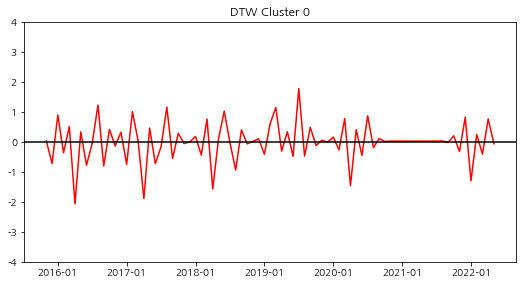

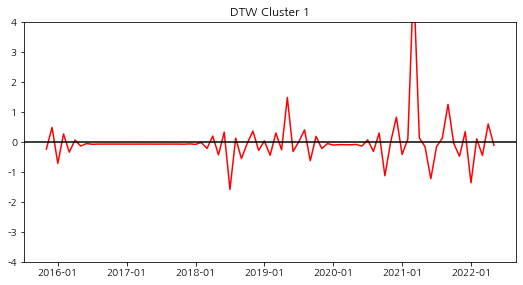

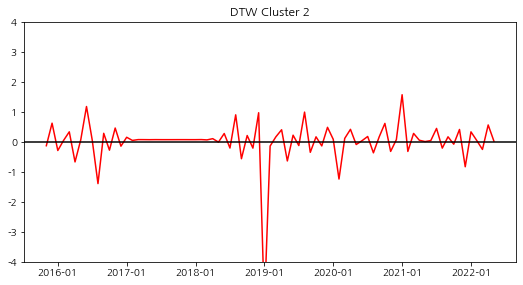

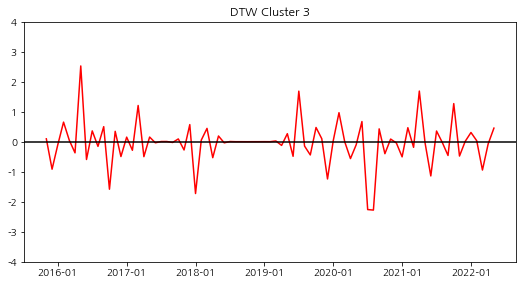

In [27]:
# plot DBA-k-means clusters
for yi in range(4):
    plt.figure(figsize=(30,15))
    plt.subplot(3, 3, 4 + yi)
    #for xx in df_scaled[y_pred == yi]:
        #plt.plot(xx.ravel(), "k-", alpha=.1)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.axhline(0,0,79,color="black")
    plt.xticks([2,14,26,38,50,62,74],labels=['2016-01','2017-01','2018-01','2019-01','2020-01','2021-01','2022-01'])
    plt.ylim(-4, 4)
    if yi == 0:
        plt.title("DTW Cluster 0")
    elif yi == 1:
        plt.title("DTW Cluster 1")
    elif yi == 2:
        plt.title("DTW Cluster 2")
    else:
        plt.title("DTW Cluster 3")

(array([1779.,    0.,    0.,  658.,    0.,    0.,  790.,    0.,    0.,
         871.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

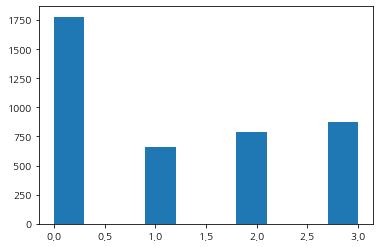

In [28]:
# 군집별 개수 보기
dba_dtw_labels = dba_km.labels_
plt.hist(dba_dtw_labels)

In [29]:
names = df_transposed.index.values
print(names)

['강원_강릉시_제조업_1차 금속 제조업' '강원_강릉시_제조업_가구 제조업' '강원_강릉시_제조업_고무 및 플라스틱제품 제조업'
 ... '충북_충주시_제조업_전자부품; 컴퓨터; 영상; 음향 및 통신장비 제조업'
 '충북_충주시_제조업_펄프; 종이 및 종이제품 제조업' '충북_충주시_제조업_화학물질 및 화학제품 제조업; 의약품 제외']


In [ ]:
df_transposed.head()

STDR_YM,2015-11-01 00:00:00,2015-12-01 00:00:00,2016-01-01 00:00:00,2016-02-01 00:00:00,2016-03-01 00:00:00,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,2016-08-01 00:00:00,...,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,clusters
CTPRVN_SIGUNGU_INDUTY,,,,,,,,,,,,,,,,,,,,,
강원_강릉시_제조업_1차 금속 제조업,0.000000,-0.111111,-0.100000,0.000000,0.100000,-0.100000,0.000000,0.000000,0.100000,0.111111,...,0.000000,0.000000,-0.076923,-0.035714,-0.035714,0.000000,0.000000,0.034483,0.037037,4
강원_강릉시_제조업_가구 제조업,0.000000,0.000000,-0.055556,0.000000,0.000000,0.000000,0.055556,0.000000,-0.055556,0.000000,...,-0.100000,-0.033333,0.032258,-0.033333,-0.032258,0.000000,-0.060606,0.030303,0.031250,4
강원_강릉시_제조업_고무 및 플라스틱제품 제조업,0.037037,-0.012821,0.000000,0.011905,-0.050000,0.025316,0.000000,0.025974,-0.083333,0.060976,...,0.014925,0.016129,-0.046875,0.015152,0.015625,0.015152,0.016393,0.050847,0.070175,0
강원_강릉시_제조업_금속가공제품 제조업; 기계 및 가구 제외,0.040000,0.021739,-0.021277,0.000000,-0.111111,-0.037037,-0.017241,-0.049180,0.000000,0.034483,...,-0.014085,-0.026667,0.013333,0.000000,0.013514,-0.013514,0.000000,-0.013333,-0.013333,0
강원_강릉시_제조업_기타 기계 및 장비 제조업,-0.007299,0.018248,-0.011029,0.000000,0.018519,0.003745,0.011321,-0.003802,-0.007576,0.003759,...,-0.023729,0.019868,-0.003436,0.068493,-0.003636,0.039711,-0.007435,-0.018382,0.000000,0


In [30]:
# 제조업 중분류 별 클러스터 확인
df_dtw = pd.DataFrame({'Industry': names, 'Clusters': dba_dtw_labels})
df_dtw.head(10)

,Industry,Clusters
0,강원_강릉시_제조업_1차 금속 제조업,3
1,강원_강릉시_제조업_가구 제조업,2
2,강원_강릉시_제조업_고무 및 플라스틱제품 제조업,0
3,강원_강릉시_제조업_금속가공제품 제조업; 기계 및 가구 제외,0
4,강원_강릉시_제조업_기타 기계 및 장비 제조업,1
5,강원_강릉시_제조업_기타 제품 제조업,3
6,강원_강릉시_제조업_목재 및 나무제품 제조업; 가구 제외,2
7,강원_강릉시_제조업_비금속 광물제품 제조업,0
8,강원_강릉시_제조업_산업용 기계 및 장비 수리업,3
9,강원_강릉시_제조업_식료품 제조업,3


In [31]:
df_dtw['MID'] = df_dtw['Industry'].str.split("_").str.get(3)
df_dtw = df_dtw[['MID','Clusters']]
df_dtw.head()

,MID,Clusters
0,1차 금속 제조업,3
1,가구 제조업,2
2,고무 및 플라스틱제품 제조업,0
3,금속가공제품 제조업; 기계 및 가구 제외,0
4,기타 기계 및 장비 제조업,1


In [32]:
dba_km.cluster_centers_[0].ravel()

array([ 3.02550107e-02, -7.21375098e-01,  8.95902027e-01, -3.61778658e-01,
        5.08239083e-01, -2.06808558e+00,  3.35320689e-01, -7.80001445e-01,
       -4.26789455e-02,  1.22925242e+00, -8.04573345e-01,  4.15555394e-01,
       -1.34328203e-01,  3.24409334e-01, -7.48966621e-01,  1.00667373e+00,
        3.44874676e-02, -1.89062964e+00,  4.59010225e-01, -7.24985854e-01,
       -1.54629747e-01,  1.15844830e+00, -5.51311944e-01,  2.88520912e-01,
       -5.62532675e-02,  1.83892309e-03,  1.82049957e-01, -4.39999373e-01,
        7.59309968e-01, -1.57009744e+00,  9.48599766e-02,  1.02753103e+00,
       -2.94067039e-02, -9.39133486e-01,  4.01041860e-01, -6.51252104e-02,
        1.57717130e-02,  1.04471869e-01, -4.13395028e-01,  6.07231934e-01,
        1.14971175e+00, -3.09360627e-01,  3.38952112e-01, -4.83684359e-01,
        1.77652343e+00, -4.72538129e-01,  4.84233793e-01, -1.19776479e-01,
        5.41087257e-02, -9.53836732e-03,  1.59251526e-01, -2.64422526e-01,
        7.78635595e-01, -

In [33]:
pd.set_option('display.max_seq_items', None)
pd.set_option('display.width', 10)

In [34]:
# row 생략 없이 출력
pd.set_option('display.max_rows', None)

In [35]:
# cluster0 에 속한 제조업 확인 -> '식료품 제조업' 비율 가장 높음
c0 = df_dtw[df_dtw['Clusters'] == 0]
c0.value_counts()

MID                           Clusters
식료품 제조업                       0           131
기타 기계 및 장비 제조업                0           120
비금속 광물제품 제조업                  0           116
금속가공제품 제조업; 기계 및 가구 제외        0           115
전기장비 제조업                      0           109
화학물질 및 화학제품 제조업; 의약품 제외       0            93
고무 및 플라스틱제품 제조업               0            92
기타 제품 제조업                     0            91
의료; 정밀; 광학기기 및 시계 제조업         0            86
섬유제품 제조업; 의복제외                0            80
1차 금속 제조업                     0            72
전자부품; 컴퓨터; 영상; 음향 및 통신장비 제조업  0            69
목재 및 나무제품 제조업; 가구 제외          0            67
펄프; 종이 및 종이제품 제조업             0            66
가구 제조업                        0            61
인쇄 및 기록매체 복제업                 0            60
의복; 의복 액세서리 및 모피제품 제조업        0            57
자동차 및 트레일러 제조업                0            56
기타 운송장비 제조업                   0            52
의료용 물질 및 의약품 제조업              0            49
음료 제조업                        0          

In [36]:
# cluster1 에 속한 제조업 확인 -> '섬유제품 제조업; 의복제외' 비율 가장 높음
c1 = df_dtw[df_dtw['Clusters'] == 1]
c1.value_counts()

MID                           Clusters
섬유제품 제조업; 의복제외                1           41
1차 금속 제조업                     1           40
고무 및 플라스틱제품 제조업               1           40
화학물질 및 화학제품 제조업; 의약품 제외       1           38
비금속 광물제품 제조업                  1           37
자동차 및 트레일러 제조업                1           34
금속가공제품 제조업; 기계 및 가구 제외        1           33
산업용 기계 및 장비 수리업               1           33
식료품 제조업                       1           31
기타 기계 및 장비 제조업                1           29
전자부품; 컴퓨터; 영상; 음향 및 통신장비 제조업  1           29
기타 제품 제조업                     1           27
전기장비 제조업                      1           27
의료; 정밀; 광학기기 및 시계 제조업         1           27
목재 및 나무제품 제조업; 가구 제외          1           26
기타 운송장비 제조업                   1           26
가죽; 가방 및 신발 제조업               1           21
의복; 의복 액세서리 및 모피제품 제조업        1           21
펄프; 종이 및 종이제품 제조업             1           21
의료용 물질 및 의약품 제조업              1           19
인쇄 및 기록매체 복제업                 1           18
가구 제조업          

In [37]:
# cluster2 에 속한 제조업 확인 -> '자동차 및 트레일러 제조업' 비율 가장 높음
c2 = df_dtw[df_dtw['Clusters'] == 2]
c2.value_counts()

MID                           Clusters
자동차 및 트레일러 제조업                2           50
화학물질 및 화학제품 제조업; 의약품 제외       2           48
산업용 기계 및 장비 수리업               2           42
식료품 제조업                       2           41
펄프; 종이 및 종이제품 제조업             2           40
전자부품; 컴퓨터; 영상; 음향 및 통신장비 제조업  2           40
전기장비 제조업                      2           40
고무 및 플라스틱제품 제조업               2           38
금속가공제품 제조업; 기계 및 가구 제외        2           37
비금속 광물제품 제조업                  2           37
가구 제조업                        2           33
의복; 의복 액세서리 및 모피제품 제조업        2           32
1차 금속 제조업                     2           32
인쇄 및 기록매체 복제업                 2           31
기타 기계 및 장비 제조업                2           30
기타 제품 제조업                     2           30
의료; 정밀; 광학기기 및 시계 제조업         2           30
의료용 물질 및 의약품 제조업              2           29
음료 제조업                        2           27
섬유제품 제조업; 의복제외                2           25
기타 운송장비 제조업                   2           24
목재 및 나무제품 제조업; 가

In [38]:
# cluster3 에 속한 제조업 확인 -> '화학물질 및 화학제품 제조업; 의약품 제외' 비율 가장 높음
c3 = df_dtw[df_dtw['Clusters'] == 3]
c3.value_counts()

MID                           Clusters
화학물질 및 화학제품 제조업; 의약품 제외       3           48
기타 제품 제조업                     3           47
기타 기계 및 장비 제조업                3           46
비금속 광물제품 제조업                  3           46
식료품 제조업                       3           44
금속가공제품 제조업; 기계 및 가구 제외        3           44
전자부품; 컴퓨터; 영상; 음향 및 통신장비 제조업  3           43
고무 및 플라스틱제품 제조업               3           42
목재 및 나무제품 제조업; 가구 제외          3           42
펄프; 종이 및 종이제품 제조업             3           39
기타 운송장비 제조업                   3           39
전기장비 제조업                      3           38
의료; 정밀; 광학기기 및 시계 제조업         3           38
1차 금속 제조업                     3           36
가구 제조업                        3           34
섬유제품 제조업; 의복제외                3           33
자동차 및 트레일러 제조업                3           31
음료 제조업                        3           29
의복; 의복 액세서리 및 모피제품 제조업        3           29
산업용 기계 및 장비 수리업               3           28
의료용 물질 및 의약품 제조업              3           26
인쇄 및 기록매체 복제업   

### 시각화(제조업)

In [39]:
df2.head()

,STDR_YM,R_INDEX,CTPRVN_SIGUNGU_INDUTY
0,2015-11-01,0.000000,강원_강릉시_제조업_1차 금속 제조업
1,2015-11-01,0.000000,강원_강릉시_제조업_가구 제조업
2,2015-11-01,0.037037,강원_강릉시_제조업_고무 및 플라스틱제품 제조업
3,2015-11-01,0.040000,강원_강릉시_제조업_금속가공제품 제조업; 기계 및 가구 제외
4,2015-11-01,-0.007299,강원_강릉시_제조업_기타 기계 및 장비 제조업


In [40]:
df2['MID'] = df2['CTPRVN_SIGUNGU_INDUTY'].str.split("_").str.get(3)
df3 = df2[['MID','STDR_YM','R_INDEX']]
df3.head()

,MID,STDR_YM,R_INDEX
0,1차 금속 제조업,2015-11-01,0.000000
1,가구 제조업,2015-11-01,0.000000
2,고무 및 플라스틱제품 제조업,2015-11-01,0.037037
3,금속가공제품 제조업; 기계 및 가구 제외,2015-11-01,0.040000
4,기타 기계 및 장비 제조업,2015-11-01,-0.007299


In [41]:
# '년월, 중분류' 같은 행 묶어서 sum 처리
df_sum3 = df3.groupby(["STDR_YM", "MID"],as_index=False).mean()

In [42]:
d0 = df_sum3[df_sum3['MID'] == '식료품 제조업']
d1 = df_sum3[df_sum3['MID'] == '섬유제품 제조업; 의복제외']
d2 = df_sum3[df_sum3['MID'] == '자동차 및 트레일러 제조업']
d3 = df_sum3[df_sum3['MID'] == '화학물질 및 화학제품 제조업; 의약품 제외']

In [43]:
d0 = d0[['STDR_YM','R_INDEX']]
d1 = d1[['STDR_YM','R_INDEX']]
d2 = d2[['STDR_YM','R_INDEX']]
d3 = d3[['STDR_YM','R_INDEX']]

Text(0.5, 1.0, '식료품 제조업')

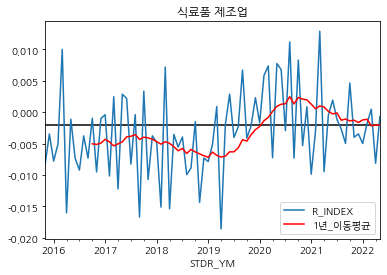

In [46]:
# 12개월 단위로 이동평균 나타내기
 
d0['1년_이동평균'] = d0['R_INDEX'].rolling(window=12).mean()
ax = d0.plot(x='STDR_YM', y='R_INDEX')
d0.plot(x='STDR_YM', y='1년_이동평균', color='red', ax=ax)
plt.hlines(-0.002,'2015-11-01','2022-05-01',color="black")
plt.title('식료품 제조업')

Text(0.5, 1.0, '섬유제품 제조업; 의복제외')

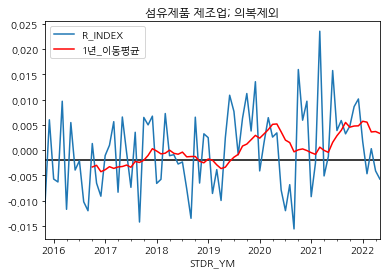

In [47]:
# 12개월 단위로 이동평균 나타내기
 
d1['1년_이동평균'] = d1['R_INDEX'].rolling(window=12).mean()
ax = d1.plot(x='STDR_YM', y='R_INDEX')
d1.plot(x='STDR_YM', y='1년_이동평균', color='red', ax=ax)
plt.hlines(-0.002,'2015-11-01','2022-05-01',color="black")
plt.title('섬유제품 제조업; 의복제외')

Text(0.5, 1.0, '자동차 및 트레일러 제조업')

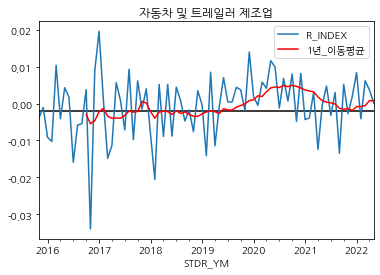

In [48]:
# 12개월 단위로 이동평균 나타내기
 
d2['1년_이동평균'] = d2['R_INDEX'].rolling(window=12).mean()
ax = d2.plot(x='STDR_YM', y='R_INDEX')
d2.plot(x='STDR_YM', y='1년_이동평균', color='red', ax=ax)
plt.hlines(-0.002,'2015-11-01','2022-05-01',color="black")
plt.title('자동차 및 트레일러 제조업')

Text(0.5, 1.0, '화학물질 및 화학제품 제조업; 의약품 제외')

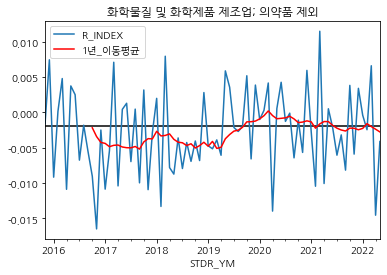

In [49]:
# 12개월 단위로 이동평균 나타내기
 
d3['1년_이동평균'] = d3['R_INDEX'].rolling(window=12).mean()
ax = d3.plot(x='STDR_YM', y='R_INDEX')
d3.plot(x='STDR_YM', y='1년_이동평균', color='red', ax=ax)
plt.hlines(-0.002,'2015-11-01','2022-05-01',color="black")
plt.title('화학물질 및 화학제품 제조업; 의약품 제외')

# 비제조업(광업)전처리

In [50]:
d_광업 = d[(d['INDUTY_LCLAS_NM'] == '광업')]

In [51]:
# 결측치 -> 세종시
d_광업['SIGNGU_NM'].fillna('세종시')

0                 강릉시
1                 강릉시
44                강릉시
204               강릉시
237               강릉시
256               강릉시
293               강릉시
363               강릉시
407               강릉시
646               강릉시
647               강릉시
699               고성군
700               고성군
701               고성군
732               고성군
762               고성군
860               동해시
965               동해시
1055              삼척시
1056              삼척시
1124              삼척시
1125              삼척시
1126              삼척시
1165              삼척시
1166              삼척시
1200              삼척시
1201              삼척시
1202              삼척시
1244              삼척시
1435              양구군
1460              양구군
1510              양양군
1511              양양군
1596              양양군
1597              양양군
1628              영월군
1651              영월군
1729              영월군
1743              영월군
1796              원주시
1936              원주시
2011              원주시
2148              원주시
2227              원주시
2228              원주시
2376      

In [52]:
d_광업.loc[d_광업['SIGNGU_NM'] != d_광업['SIGNGU_NM'], 'SIGNGU_NM'] = '세종시'

In [53]:
# 평균임금 null값 제거
mask1 = d_광업['WAGE_AVRG_AM'].isnull()
d_광업 = d_광업[~mask1]

In [54]:
# 평균임금 0인 값 제거
mask = d_광업['WAGE_AVRG_AM'].isin([0])
d_광업 = d_광업[~mask]

In [55]:
# 필요 칼럼만 추출
df = d_광업[['STDR_YM','CTPRVN_NM','SIGNGU_NM','INDUTY_LCLAS_NM','INDUTY_MLSFC_NM','EMPLY_CO','RETIRE_CO','ECNY_CO']]
df.head()

,STDR_YM,CTPRVN_NM,SIGNGU_NM,INDUTY_LCLAS_NM,INDUTY_MLSFC_NM,EMPLY_CO,RETIRE_CO,ECNY_CO
0,2015-11,강원,강릉시,광업,비금속광물 광업; 연료용 제외,3,0,0
1,2015-11,강원,강릉시,광업,비금속광물 광업; 연료용 제외,3,0,0
44,2015-11,강원,강릉시,광업,비금속광물 광업; 연료용 제외,7,4,1
204,2015-11,강원,강릉시,광업,비금속광물 광업; 연료용 제외,6,0,1
237,2015-11,강원,강릉시,광업,비금속광물 광업; 연료용 제외,5,0,0


In [56]:
# '년월, 시군구, 대분류' 같은 행 묶어서 평균 처리
df_avg = df.groupby(["CTPRVN_NM", "STDR_YM", "SIGNGU_NM", "INDUTY_LCLAS_NM",'INDUTY_MLSFC_NM'],as_index=False).mean()

In [57]:
# '년월, 시군구, 대분류' 같은 행 묶어서 sum 처리
df_sum = df.groupby(["CTPRVN_NM", "STDR_YM", "SIGNGU_NM", "INDUTY_LCLAS_NM",'INDUTY_MLSFC_NM'],as_index=False).sum()

In [58]:
def risk_index(df):
  return (df['RETIRE_CO'] - df['ECNY_CO']) / df['EMPLY_CO']

df_sum['R_INDEX']= df_sum.apply(risk_index,axis=1)

# 광업 시계열 클러스터링

In [59]:
df2 = df_sum[['STDR_YM','CTPRVN_NM','SIGNGU_NM','INDUTY_LCLAS_NM','INDUTY_MLSFC_NM','R_INDEX']]
df2.head()

,STDR_YM,CTPRVN_NM,SIGNGU_NM,INDUTY_LCLAS_NM,INDUTY_MLSFC_NM,R_INDEX
0,2015-11,강원,강릉시,광업,비금속광물 광업; 연료용 제외,0.046154
1,2015-11,강원,고성군,광업,비금속광물 광업; 연료용 제외,0.000000
2,2015-11,강원,동해시,광업,비금속광물 광업; 연료용 제외,0.006944
3,2015-11,강원,삼척시,광업,광업 지원 서비스업,-0.016393
4,2015-11,강원,삼척시,광업,비금속광물 광업; 연료용 제외,0.000000


In [60]:
df2['CTPRVN_SIGUNGU_INDUTY'] = df2[['CTPRVN_NM', 'SIGNGU_NM', 'INDUTY_LCLAS_NM','INDUTY_MLSFC_NM']].apply(lambda x: '_'.join(x), axis=1)

In [61]:
df2 = df2[['STDR_YM','R_INDEX','CTPRVN_SIGUNGU_INDUTY']]

In [62]:
df2['STDR_YM'] = pd.to_datetime(df2['STDR_YM'])

In [63]:
df22 = df2.pivot(
    index='STDR_YM',
    columns='CTPRVN_SIGUNGU_INDUTY',
    values='R_INDEX')
df22.head()

CTPRVN_SIGUNGU_INDUTY,강원_강릉시_광업_금속 광업,강원_강릉시_광업_비금속광물 광업; 연료용 제외,강원_고성군_광업_비금속광물 광업; 연료용 제외,강원_동해시_광업_비금속광물 광업; 연료용 제외,강원_삼척시_광업_광업 지원 서비스업,강원_삼척시_광업_비금속광물 광업; 연료용 제외,강원_삼척시_광업_석탄; 원유 및 천연가스 광업,강원_양구군_광업_비금속광물 광업; 연료용 제외,강원_양양군_광업_광업 지원 서비스업,강원_양양군_광업_금속 광업,...,충북_제천시_광업_비금속광물 광업; 연료용 제외,충북_증평군_광업_비금속광물 광업; 연료용 제외,충북_진천군_광업_비금속광물 광업; 연료용 제외,충북_청주시 서원구_광업_비금속광물 광업; 연료용 제외,충북_청주시 청원구_광업_비금속광물 광업; 연료용 제외,충북_청주시 흥덕구_광업_광업 지원 서비스업,충북_청주시 흥덕구_광업_비금속광물 광업; 연료용 제외,충북_충주시_광업_광업 지원 서비스업,충북_충주시_광업_금속 광업,충북_충주시_광업_비금속광물 광업; 연료용 제외
STDR_YM,,,,,,,,,,,,,,,,,,,,,
2015-11-01,NaN,0.046154,0.000000,0.006944,-0.016393,0.000000,0.000000,0.0,NaN,0.0,...,-0.020000,NaN,-0.083333,NaN,NaN,NaN,0.000000,NaN,NaN,-0.015038
2015-12-01,NaN,0.032258,0.272727,0.027972,0.049180,0.023256,0.000000,0.0,NaN,0.0,...,0.020833,NaN,-0.040000,NaN,NaN,NaN,0.000000,NaN,NaN,-0.007246
2016-01-01,NaN,0.000000,-0.210526,0.007143,-0.340909,0.000000,0.009009,0.0,NaN,0.0,...,0.000000,NaN,0.040000,NaN,NaN,NaN,-0.018868,NaN,NaN,0.022388
2016-02-01,NaN,0.051724,0.000000,0.007246,0.022727,-0.024390,-0.081301,0.0,NaN,0.0,...,0.000000,0.0,-0.080000,NaN,NaN,NaN,0.018868,NaN,NaN,0.007407
2016-03-01,NaN,0.018519,0.047619,0.000000,0.000000,0.025000,0.008197,0.0,NaN,0.0,...,-0.109091,NaN,0.037037,NaN,NaN,NaN,-0.018868,NaN,NaN,0.052239


In [64]:
df22.dropna(axis='columns', how='any',inplace=True)

In [65]:
df_transposed = df22.T
df_transposed.head()

STDR_YM,2015-11-01,2015-12-01,2016-01-01,2016-02-01,2016-03-01,2016-04-01,2016-05-01,2016-06-01,2016-07-01,2016-08-01,...,2021-08-01,2021-09-01,2021-10-01,2021-11-01,2021-12-01,2022-01-01,2022-02-01,2022-03-01,2022-04-01,2022-05-01
CTPRVN_SIGUNGU_INDUTY,,,,,,,,,,,,,,,,,,,,,
강원_강릉시_광업_비금속광물 광업; 연료용 제외,0.046154,0.032258,0.000000,0.051724,0.018519,0.000000,-0.118644,0.033898,0.034483,0.000000,...,0.000000,0.033898,0.034483,-0.034483,-0.016949,0.000000,-0.035714,0.050847,-0.017857,0.000000
강원_고성군_광업_비금속광물 광업; 연료용 제외,0.000000,0.272727,-0.210526,0.000000,0.047619,0.000000,-0.269231,0.115385,0.000000,-0.083333,...,0.041667,-0.038462,0.000000,-0.035714,0.074074,0.190476,-0.062500,-0.050000,-0.050000,-0.148148
강원_동해시_광업_비금속광물 광업; 연료용 제외,0.006944,0.027972,0.007143,0.007246,0.000000,0.000000,-0.007194,-0.014085,-0.007092,0.014184,...,-0.057471,0.000000,-0.011364,0.011628,-0.022472,0.022472,0.011628,-0.011494,0.034091,0.011905
강원_삼척시_광업_광업 지원 서비스업,-0.016393,0.049180,-0.340909,0.022727,0.000000,0.011628,0.000000,0.000000,0.046512,-0.035294,...,0.040000,0.000000,0.000000,0.166667,0.050000,0.000000,0.000000,-0.240000,0.000000,0.000000
강원_삼척시_광업_비금속광물 광업; 연료용 제외,0.000000,0.023256,0.000000,-0.024390,0.025000,-0.338983,-0.063492,-0.030769,0.015385,-0.015385,...,0.010000,-0.039604,0.009709,-0.028571,0.047170,-0.030000,0.000000,-0.019608,-0.018868,0.000000


In [66]:
df_matrix = df_transposed.to_numpy()

In [67]:
scaler = TimeSeriesScalerMeanVariance()
df_scaled = scaler.fit_transform(df_matrix)

In [68]:
sz = df_scaled.shape[1]

k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9
k:  10
k:  11


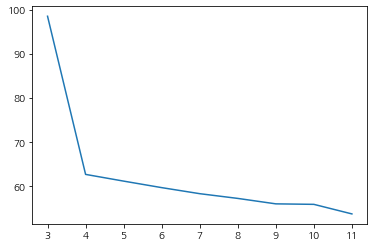

In [ ]:
# Elbow criterion
def elbow_plot(data, maxK=10, seed_centroids=None):
    sse = {}
    for k in range(3, maxK):
        print("k: ", k)
        if seed_centroids is not None:
            seeds = seed_centroids.head(k)
            kmeans = cluster.KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=0, init=np.reshape(seeds, (k,1))).fit(data)
            data["clusters"] = kmeans.labels_
        else:
            kmeans = cluster.KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data)
            data["clusters"] = kmeans.labels_

        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()
    return


elbow_plot(df_transposed, maxK=12)
# 4가 best

In [69]:
# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=4, n_init=2, metric="dtw", verbose=True, max_iter_barycenter=2, random_state=1)
y_pred = dba_km.fit_predict(df_scaled)

DBA k-means
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 139 out of 139 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 417 out of 417 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 417 out of 417 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 417 out of 417 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 556 out of 556 | elapsed:    0.1s finished


45.075 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 556 out of 556 | elapsed:    0.1s finished


32.314 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 556 out of 556 | elapsed:    0.1s finished


31.712 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 556 out of 556 | elapsed:    0.1s finished


31.491 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 556 out of 556 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


31.371 --> 31.357 --> 

[Parallel(n_jobs=1)]: Done 556 out of 556 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 556 out of 556 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


31.357 --> 
Init 2


[Parallel(n_jobs=1)]: Done 139 out of 139 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 417 out of 417 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 417 out of 417 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 417 out of 417 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 556 out of 556 | elapsed:    0.1s finished


42.223 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 556 out of 556 | elapsed:    0.1s finished


31.968 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 556 out of 556 | elapsed:    0.1s finished


31.210 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 556 out of 556 | elapsed:    0.1s finished


31.141 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 556 out of 556 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


31.076 --> 31.064 --> 

[Parallel(n_jobs=1)]: Done 556 out of 556 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 556 out of 556 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


31.064 --> 


[Parallel(n_jobs=1)]: Done 556 out of 556 | elapsed:    0.1s finished


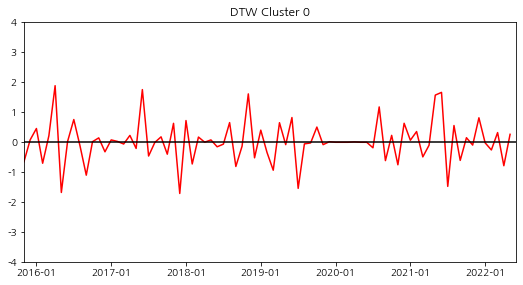

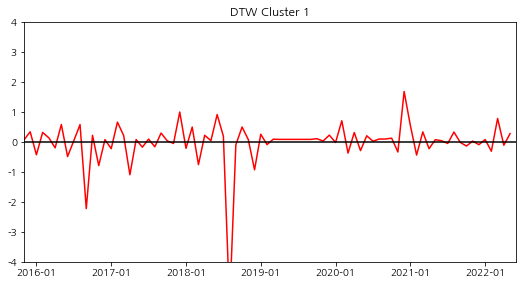

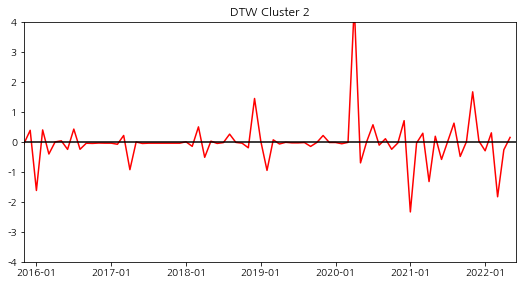

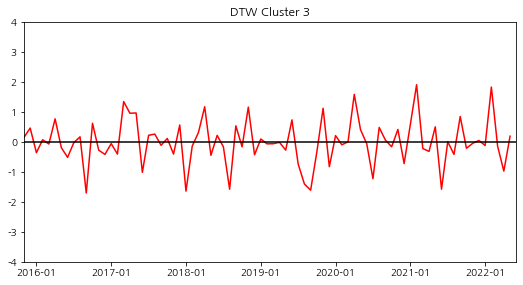

In [70]:
# plot DBA-k-means clusters
for yi in range(4):
    plt.figure(figsize=(30,15))
    plt.subplot(3, 3, 4 + yi)
    #for xx in df_scaled[y_pred == yi]:
        #plt.plot(xx.ravel(), "k-", alpha=.1)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xticks([2,14,26,38,50,62,74],labels=['2016-01','2017-01','2018-01','2019-01','2020-01','2021-01','2022-01'])
    plt.axhline(0,0,79,color="black")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 0:
        plt.title("DTW Cluster 0")
    elif yi == 1:
        plt.title("DTW Cluster 1")
    elif yi == 2:
        plt.title("DTW Cluster 2")
    else:
        plt.title("DTW Cluster 3")

In [71]:
# Get the DBA DTW cluster labels
dba_dtw_labels = dba_km.labels_

In [72]:
names = df_transposed.index.values

In [73]:
# create a new data frame from the euclidean distance clusters and stock symbols where K=5
df_dtw = pd.DataFrame({'Industry': names, 'Clusters': dba_dtw_labels})
df_dtw.head(10)

,Industry,Clusters
0,강원_강릉시_광업_비금속광물 광업; 연료용 제외,3
1,강원_고성군_광업_비금속광물 광업; 연료용 제외,0
2,강원_동해시_광업_비금속광물 광업; 연료용 제외,1
3,강원_삼척시_광업_광업 지원 서비스업,2
4,강원_삼척시_광업_비금속광물 광업; 연료용 제외,1
5,강원_삼척시_광업_석탄; 원유 및 천연가스 광업,2
6,강원_양구군_광업_비금속광물 광업; 연료용 제외,1
7,강원_양양군_광업_비금속광물 광업; 연료용 제외,0
8,강원_영월군_광업_광업 지원 서비스업,2
9,강원_영월군_광업_비금속광물 광업; 연료용 제외,3


In [74]:
df_dtw['MID'] = df_dtw['Industry'].str.split("_").str.get(3)
df_dtw = df_dtw[['MID','Clusters']]
df_dtw.head()

,MID,Clusters
0,비금속광물 광업; 연료용 제외,3
1,비금속광물 광업; 연료용 제외,0
2,비금속광물 광업; 연료용 제외,1
3,광업 지원 서비스업,2
4,비금속광물 광업; 연료용 제외,1


In [75]:
df2['MID'] = df2['CTPRVN_SIGUNGU_INDUTY'].str.split("_").str.get(3)
df3 = df2[['MID','STDR_YM','R_INDEX']]
df3.head()

,MID,STDR_YM,R_INDEX
0,비금속광물 광업; 연료용 제외,2015-11-01,0.046154
1,비금속광물 광업; 연료용 제외,2015-11-01,0.000000
2,비금속광물 광업; 연료용 제외,2015-11-01,0.006944
3,광업 지원 서비스업,2015-11-01,-0.016393
4,비금속광물 광업; 연료용 제외,2015-11-01,0.000000


In [76]:
# '년월, 중분류' 같은 행 묶어서 sum 처리
df_sum3 = df3.groupby(["STDR_YM", "MID"],as_index=False).mean()

In [77]:
d0 = df_sum3[df_sum3['MID'] == '비금속광물 광업; 연료용 제외']
d1 = df_sum3[df_sum3['MID'] == '광업 지원 서비스업']
d2 = df_sum3[df_sum3['MID'] == '석탄; 원유 및 천연가스 광업']

In [78]:
d0 = d0[['STDR_YM','R_INDEX']]
d1 = d1[['STDR_YM','R_INDEX']]
d2 = d2[['STDR_YM','R_INDEX']]

Text(0.5, 1.0, '비금속광물 광업; 연료용 제외')

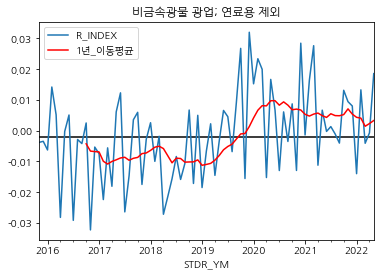

In [79]:
# 12개월 단위로 이동평균 나타내기
 
d0['1년_이동평균'] = d0['R_INDEX'].rolling(window=12).mean()
ax = d0.plot(x='STDR_YM', y='R_INDEX')
d0.plot(x='STDR_YM', y='1년_이동평균', color='red', ax=ax)
plt.hlines(-0.002,'2015-11-01','2022-05-01',color="black")
plt.title('비금속광물 광업; 연료용 제외')

Text(0.5, 1.0, '광업 지원 서비스업')

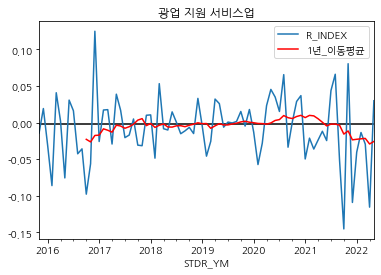

In [80]:
# 12개월 단위로 이동평균 나타내기
 
d1['1년_이동평균'] = d1['R_INDEX'].rolling(window=12).mean()
ax = d1.plot(x='STDR_YM', y='R_INDEX')
d1.plot(x='STDR_YM', y='1년_이동평균', color='red', ax=ax)
plt.hlines(-0.002,'2015-11-01','2022-05-01',color="black")
plt.title('광업 지원 서비스업')

Text(0.5, 1.0, '석탄; 원유 및 천연가스 광업')

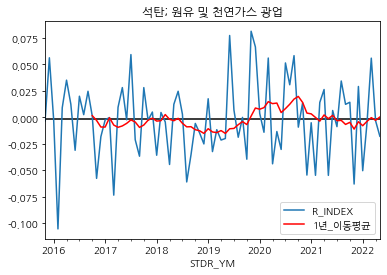

In [81]:
# 12개월 단위로 이동평균 나타내기
 
d2['1년_이동평균'] = d2['R_INDEX'].rolling(window=12).mean()
ax = d2.plot(x='STDR_YM', y='R_INDEX')
d2.plot(x='STDR_YM', y='1년_이동평균', color='red', ax=ax)
plt.hlines(-0.002,'2015-11-01','2022-05-01',color="black")
plt.title('석탄; 원유 및 천연가스 광업')

# 음식점 및 주점업

In [ ]:
data = "/content/drive/MyDrive/colab/guin/"
d = pd.read_csv(f'{data}종업원수.csv', encoding='cp949')

In [82]:
df=d[d.INDUTY_LCLAS_NM=='숙박 및 음식점업']

In [83]:
df['SIGNGU_NM'].fillna('세종시')
df.loc[df['SIGNGU_NM'] != df['SIGNGU_NM'], 'SIGNGU_NM'] = '세종시'

In [84]:
# 평균임금 null값 제거
mask1 = df['WAGE_AVRG_AM'].isnull()
df = df[~mask1]

In [85]:
# 평균임금 0인 값 제거
mask = df['WAGE_AVRG_AM'].isin([0])
df = df[~mask]

In [86]:
df=df[['STDR_YM', 'CTPRVN_NM', 'SIGNGU_NM',
       'INDUTY_LCLAS_NM', 'INDUTY_MLSFC_NM',
       'EMPLY_CO', 'ECNY_CO', 'RETIRE_CO']]

In [87]:
df2 = df.groupby(['STDR_YM', 'CTPRVN_NM', 'SIGNGU_NM',
        'INDUTY_MLSFC_NM'],as_index=False).sum()

In [88]:
mask = df2['EMPLY_CO'].isin([0])
df2 = df2[~mask]

In [89]:
# 고용위기지표: (퇴사자수-입사자수)/종업원수
def risk_index(df):
  return (df['RETIRE_CO'] - df['ECNY_CO']) / df['EMPLY_CO']

df2['R_INDEX']= df2.apply(risk_index,axis=1)

In [90]:
df2['STDR_YM'] = pd.to_datetime(df2['STDR_YM'], format='%Y-%m')

In [91]:
df2=df2[['STDR_YM',
        'INDUTY_MLSFC_NM','R_INDEX']]

In [92]:
df2 = df2.groupby(['STDR_YM','INDUTY_MLSFC_NM'],as_index=False).mean()

In [93]:
df2=df2[df2.INDUTY_MLSFC_NM=='음식점 및 주점업']

Text(0.5, 1.0, '음식점 및 주점업')

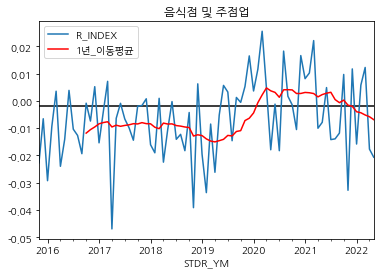

In [94]:
df2['1년_이동평균'] = df2['R_INDEX'].rolling(window=12).mean()
ax = df2.plot(x='STDR_YM', y='R_INDEX')
df2.plot(x='STDR_YM', y='1년_이동평균', color='red', ax=ax)
plt.hlines(-0.002,'2015-11-01','2022-05-01',color="black")
plt.title('음식점 및 주점업')